In [1]:
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import numpy
from InputHandler import *

Using TensorFlow backend.


In [2]:
inputHandler = InputHandler()
#X_data, Y_data = inputHandler.nbit(mfeatask.DATASET_NBIT_INP, mfeatask.DATASET_NBIT_OUT)
# X_data, Y_data = inputHandler.generateNbitDataSet(8)
X_data, Y_data = inputHandler.creditScreening('../dataset/credit-screening/crx.data')
#X_data, Y_data = inputHandler.ticTacToe(link=mfeatask.DATASET_TICTACTOE)
m = X_data.shape[1] # number of samples

train_ratio = 0.7

X_train = X_data[:, :int(train_ratio * m)].T
Y_train = Y_data[:, :int(train_ratio * m)].T
X_test = X_data[:, int(train_ratio * m):].T
Y_test = Y_data[:, int(train_ratio * m):].T

In [3]:
X_data.T.shape

(653, 14)

In [4]:
number_hidden = 22

In [5]:
model = Sequential()
model.add(Dense(number_hidden, input_dim = X_data.shape[0], activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [6]:
history = model.fit(X_train, Y_train, epochs=100, verbose=0, validation_data=(X_test, Y_test))
# evaluate the model
# test_loss, test_acc = model.evaluate(X_test, Y_test)
# print('Test accuracy:', test_acc)

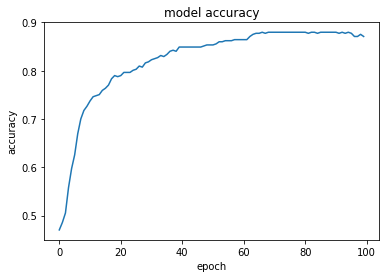

In [7]:
# summarize history for accuracy
plt.plot(history.history['acc'])
# plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper left')
plt.show()

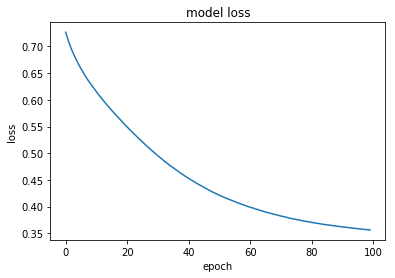

In [8]:
# summarize history for loss
plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper left')
plt.show()